## 1 - Importing all required libraries

In [ ]:
#Installing all required libaries
!pip install snscrape
!pip install gensim
!pip install wordcloud
!pip install smart_open
!pip install pyLDAvis
!pip install vaderSentiment
!pip install emoji
!pip install tweepy
!pip install googletrans==3.1.0a0
!pip install langdetect
!python -m spacy download en_core_web_md
!pip install numpy==

In [ ]:
#Installing all required libraries
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy
# !python3 -mpip install matplotlib

In [1]:
import pandas as pd
import random

##Data pre-processing libraries
import re
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import regex
import string

##Text analytics libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import sent_tokenize, word_tokenize
from pprint import pprint
import gensim
from gensim.models import CoherenceModel
import matplotlib.colors as mcolors
import gensim.corpora as corpora
import spacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn import model_selection, preprocessing, linear_model
pyLDAvis.enable_notebook()
nlp = spacy.load("en_core_web_sm")
import spacy
from spacy import displacy
from collections import Counter
import pandas as pd
import en_core_web_sm
import emoji
import regex
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

##Visualization libraries
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

##Sentiment Analysis libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Step-2: Data Import and Pre-processing

In [5]:
data = pd.read_csv('Final Dataset.csv')

data.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Search_Term,Video_URL,Video_Title,Channel_Name,Total_Subscribers,Total_Views,Total_Likes,Total_Dislikes,Total_Comments,Video_Description,Total_times_User_added_to_favorites,Video_Length,Video_Category,Video_Tags,Age_Restrictions,License,Captions_Available,search_term_video_url,domain,Relevant
0,Building career fulfillment,https://www.youtube.com/watch?v=MKlx1DLa9EA,"To find work you love, don't follow your passi...",TEDx Talks,unknown,6126878,148860,0,5942,Mainstream career advice tells us to ‚Äúfollow...,0.0,0:15:05,Nonprofits & Activism,"['ted x', 'tedx', 'Career', 'ted talks', 'ted ...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes
1,Building career fulfillment,https://www.youtube.com/watch?v=a7gFkUqIv1E,What they don't teach you about career fulfill...,TEDx Talks,unknown,292763,4873,0,123,"This talk was given at a local TEDx event, pro...",0.0,0:16:33,Nonprofits & Activism,"['ted x', 'English', 'Life', 'Psychology', 'te...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes
2,Building career fulfillment,https://www.youtube.com/watch?v=rvqvLF5UpRk,Find Fulfillment - Find your WHY,Simon Sinek,unknown,156298,1803,0,37,"Having a job we love is a right, not a privile...",0.0,0:03:18,People & Blogs,"['why', 'start with why', 'purpose', 'passion'...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes
3,Building career fulfillment,https://www.youtube.com/watch?v=0DJlWBQdbIA,How to Find Fulfillment at Work,Big Think,unknown,84417,606,0,28,New videos DAILY: https://bigth.ink/youtube\nJ...,0.0,0:01:35,Science & Technology,"['bigthink', 'aol', '5min', 'Big Think', 'BigT...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes
4,Building career fulfillment,https://www.youtube.com/watch?v=su2V2lzqbb8,Highly Sensitive Person Careers -- The REAL SE...,Odyssey Human,unknown,15167,774,0,159,HIGHLY SENSITIVE PERSON CAREERS -- THE REAL SE...,0.0,0:13:55,People & Blogs,"['highly sensitive person careers', 'hsp caree...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Search_Term                          401 non-null    object 
 1   Video_URL                            401 non-null    object 
 2   Video_Title                          401 non-null    object 
 3   Channel_Name                         401 non-null    object 
 4   Total_Subscribers                    401 non-null    object 
 5   Total_Views                          401 non-null    int64  
 6   Total_Likes                          401 non-null    int64  
 7   Total_Dislikes                       401 non-null    int64  
 8   Total_Comments                       401 non-null    int64  
 9   Video_Description                    400 non-null    object 
 10  Total_times_User_added_to_favorites  400 non-null    float64
 11  Video_Length                    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#Creating a new column by concatenating Video_title and video_description

data['Full_desc'] = data['Video_Title'] + ' ' + data['Video_Description']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Cleaning the Full_desc column to remove emoticons, non-ascii values, symbols&pictograhs, transport & map symbols.

In [8]:
#Pre-processing Full_desc column

def non_text(location):
    letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(location))
    return ''.join (letters_only)

def demoji(string):
    result = emoji.demojize(string)
    return result

def remove_non_ascii(text):
    ascii_tokens = [token for token in text.split() if all(ord(char) < 128 for char in token)]
    return " ".join(ascii_tokens)

def remove_tags(strings):
    results = re.sub('<.*?>','',strings)
    results = re.sub(r'http\s+', '', strings)
    results = re.sub(r'http://\S+|https://\S+', '', strings)
    results = re.sub(r'http[s]?://\S+', '', strings)
    results = re.sub(r"http\S+", "", strings)
    return results

def remove_emojis(strings):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              "]+", flags=re.UNICODE)
    results = emoji_pattern.sub(r'', strings)
    return results

def remove_tags(strings):
    if isinstance(strings, str):
        results = re.sub('<.*?>', '', strings)
        return results
    else:
        return strings


data['Full_desc'] = data['Full_desc'].apply(lambda cw : non_text(cw))
data['Full_desc'] = data['Full_desc'].apply(lambda cw : demoji(cw))
data['Full_desc'] = data['Full_desc'].apply(lambda cw : remove_non_ascii(cw))
data['Full_desc'] = data['Full_desc'].apply(lambda cw : remove_emojis(cw))
data['Full_desc'] = data["Full_desc"].apply(lambda cw : remove_tags(cw))

data['Full_desc'] = data['Full_desc'].apply(lambda cw : remove_tags(cw))

#Removing punctuations from Video title + description
data['Full_desc'] = data['Full_desc'].str.replace('[^\w\s]','')



#Remove proper nouns
def remove_proper_nouns(text):
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)

    # Perform part-of-speech tagging
    pos_tags = nltk.pos_tag(words)

    # Filter out proper nouns (NNP and NNP$ tags)
    filtered_words = [word for word, tag in pos_tags if tag not in ['NNP', 'NNPS']]

    # Reconstruct the text without proper nouns
    processed_text = ' '.join(filtered_words)

    return processed_text

# Example usage
data['Full_desc'] = data['Full_desc'].apply(lambda x : remove_proper_nouns(x))

#converting the strings to lower case
data['Full_desc'] = data['Full_desc'].str.lower()


data.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:52: DeprecationWarning: invalid escape sequence '\w'
<>:52: DeprecationWarning: invalid escape sequence '\w'
<ipython-input-8-06f9f93f8a8e>:52: DeprecationWarning: invalid escape sequence '\w'
  data['Full_desc'] = data['Full_desc'].str.replace('[^\w\s]','')


,Search_Term,Video_URL,Video_Title,Channel_Name,Total_Subscribers,Total_Views,Total_Likes,Total_Dislikes,Total_Comments,Video_Description,...,Video_Length,Video_Category,Video_Tags,Age_Restrictions,License,Captions_Available,search_term_video_url,domain,Relevant,Full_desc
0,Building career fulfillment,https://www.youtube.com/watch?v=MKlx1DLa9EA,"To find work you love, don't follow your passi...",TEDx Talks,unknown,6126878,148860,0,5942,Mainstream career advice tells us to ‚Äúfollow...,...,0:15:05,Nonprofits & Activism,"['ted x', 'tedx', 'Career', 'ted talks', 'ted ...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes,to find work you love don t follow your passio...
1,Building career fulfillment,https://www.youtube.com/watch?v=a7gFkUqIv1E,What they don't teach you about career fulfill...,TEDx Talks,unknown,292763,4873,0,123,"This talk was given at a local TEDx event, pro...",...,0:16:33,Nonprofits & Activism,"['ted x', 'English', 'Life', 'Psychology', 'te...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes,what they don t teach you about career fulfill...
2,Building career fulfillment,https://www.youtube.com/watch?v=rvqvLF5UpRk,Find Fulfillment - Find your WHY,Simon Sinek,unknown,156298,1803,0,37,"Having a job we love is a right, not a privile...",...,0:03:18,People & Blogs,"['why', 'start with why', 'purpose', 'passion'...",NaN,youtube,NaN,Building career fulfillment_https://www.youtub...,Personal achievement,Yes,your having a job we love is a right not a pri...


# EDA of the intervention dataset

## Missing values in the intervention dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Distribution of missing values')

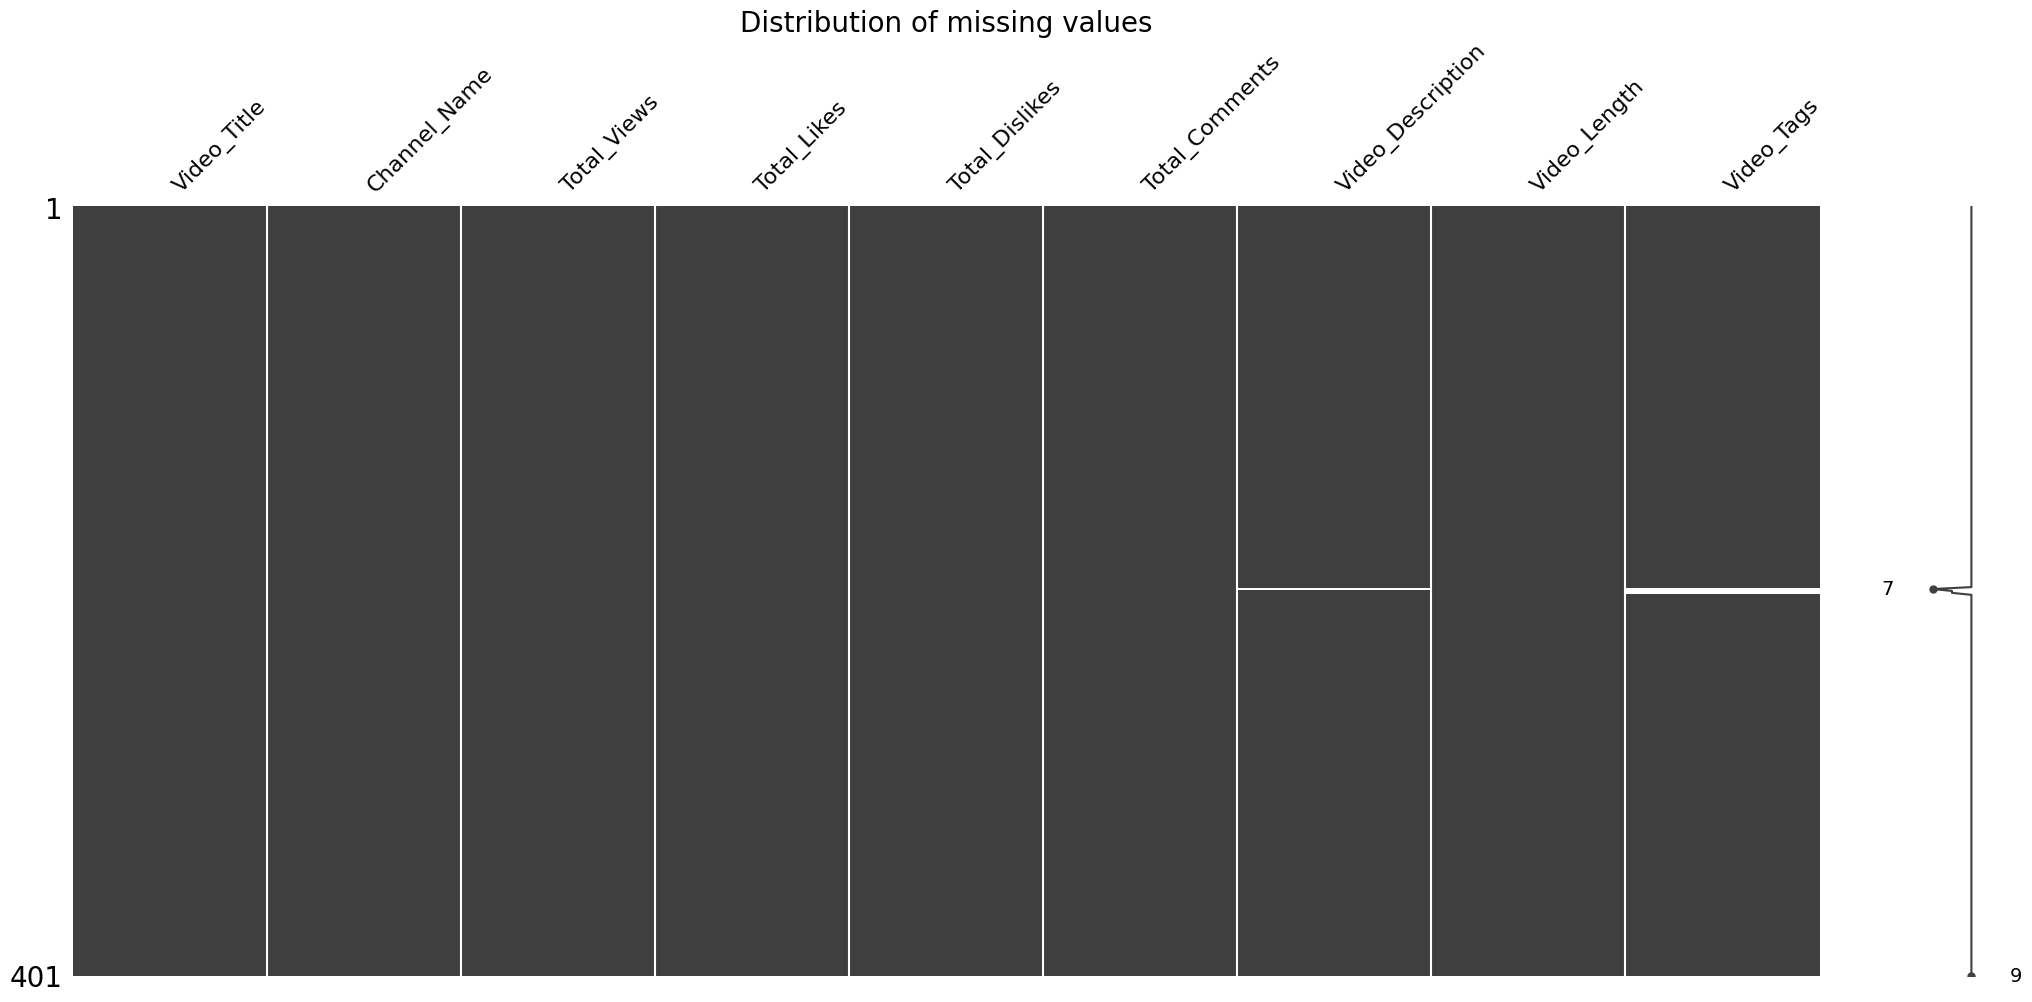

In [9]:
data1 = data.loc[:, ~data.columns.isin(['Total_Subscribers','Video_Category','Search_Term','Video_URL','domain','Relevant','Owner','Comments','Full_desc','Captions_Available','Age_Restrictions','search_term_video_url','License','Total_times_User_added_to_favorites'])]
msno.matrix(data1)
plt.title('Distribution of missing values', fontsize = 20)

## Heatmap of the numerical columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


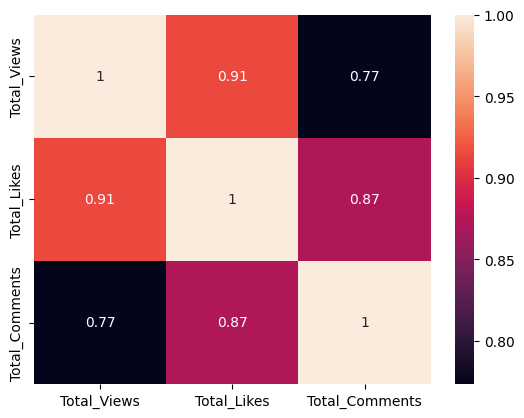

In [10]:
import seaborn as sns

data1 = data[['Total_Views','Total_Likes','Total_Comments']]
# data1
ax = sns.heatmap(data[['Total_Views','Total_Likes','Total_Comments']].corr(), annot=True)

## Finding top 5 channels with maximum no of videos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


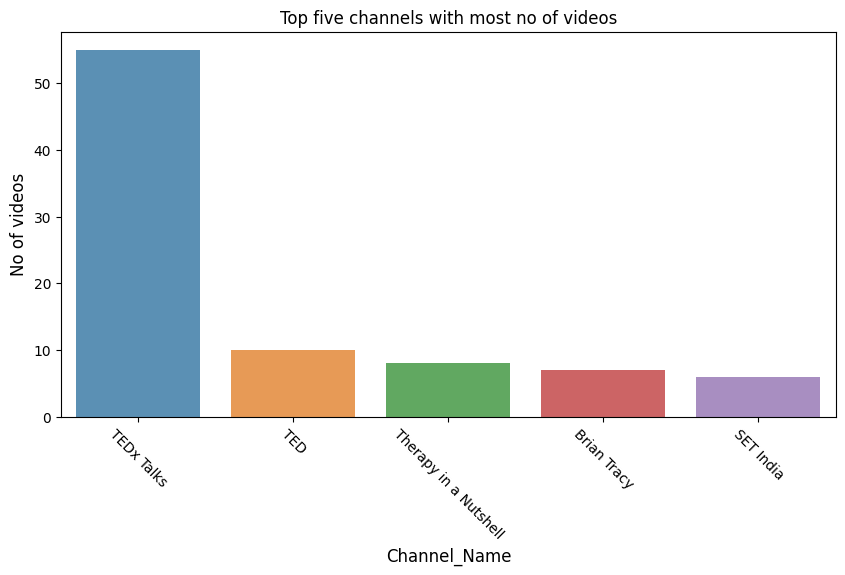

In [11]:
channel_count  = data['Channel_Name'].value_counts()
channel_count = channel_count[:5,]
plt.figure(figsize=(10,5))
hm = sns.barplot(x = channel_count.index, y = channel_count.values, alpha=0.8)
plt.xticks(rotation=-45)
plt.title('Top five channels with most no of videos')
plt.ylabel('No of videos', fontsize=12)
plt.xlabel('Channel_Name', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


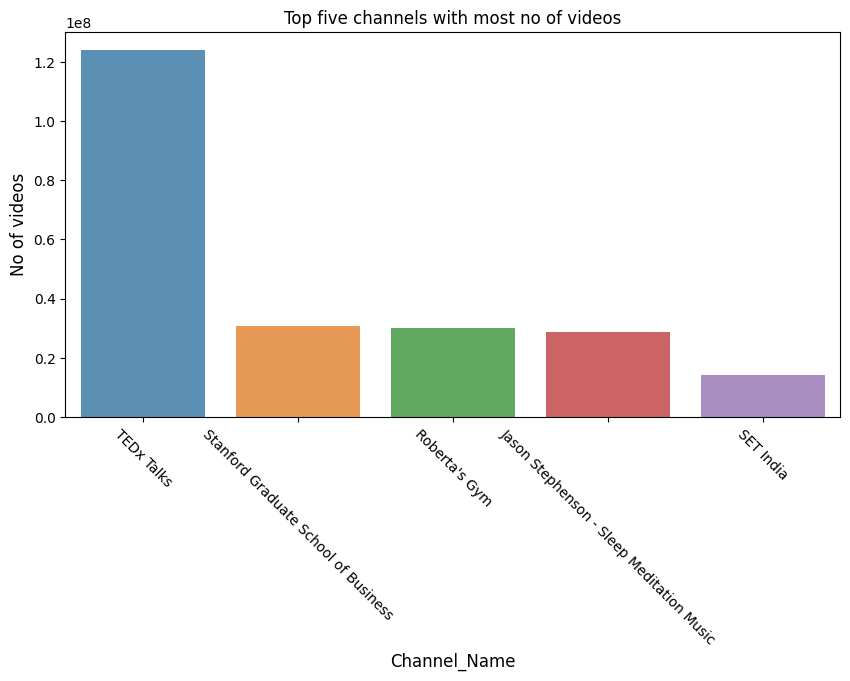

In [12]:
channel_count  = data.groupby('Channel_Name').Total_Views.sum().sort_values(ascending=False)
channel_count = channel_count[:5,]
plt.figure(figsize=(10,5))
hm = sns.barplot(x = channel_count.index, y = channel_count.values, alpha=0.8)
plt.xticks(rotation=-45)
plt.title('Top five channels with most no of videos')
plt.ylabel('No of videos', fontsize=12)
plt.xlabel('Channel_Name', fontsize=12)
plt.show()

### 2.3 - Removing stopwords from Full_desc column

In [13]:
stop_words = stopwords.words('english')
all_reviews =" ".join(data['Full_desc'])
tokenizedwords = word_tokenize(all_reviews)


# creates tokens, creates lower class, removes numbers and lemmatizes the words
def tokens_clean(tokens_new):
    tokens_new = [x for x in tokens_new if x not in stop_words]
    tokens_new = [x for x in tokens_new if x.isalpha()]
    lemma = WordNetLemmatizer()
    tokens_new = [lemma.lemmatize(x) for x in tokens_new]
    normalized = [[" ".join([lemma.lemmatize(word) for word in ' '.join(document).split()])] for document in tokens_new]
    return tokens_new


clean_words = tokens_clean(tokenizedwords)
count = Counter(clean_words)
#print(clean_words)
#count
##token_freq = pd.DataFrame(count,columns=["word","frequency"]).sort_values(by="frequency",ascending=False)

count_unique = len(clean_words)
#count_unique

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Removal of stopwords

common_words = count.most_common()[:50]


token_frequency = pd.DataFrame(count.items(),columns=["word","frequency"]).sort_values(by="frequency",ascending=False)
token_frequency.head(10)
stop3 = token_frequency[token_frequency['word'].str.len() <= 2]
stop3 = token_frequency[token_frequency['word'].str.len() <= 3]
stop3 = list(stop3['word'])
stop_words.extend(stop3)
stop_words.extend(['video','must','much','too','https','http',
                   'facebook','youtube','twitter','instagram','channel','subscribe','created','tedx','talk',
                   'event','conference','format','find','better','visit','videos','manager','tiktok','content',
                   'link','affiliate','link','links','purchase','help','href','watch','quot','owner','disabled',
                   'comments','owner','amzn','simonsinek','independently','prageru','organized','youtu','hubermanlab',
                   'local','using','best','selling','access','perk','tajd','perks','join','like','writing'
                   'pych','psych','script','position','faqs','animate','team','check','animating','interested','practicalpie'
                   'test','free','writing','list','spreading','playlist','together','share','experience'
                   'spark'])


#Defining stopword removal function and applying to reviews
def stopword_removal(x):
    return " ".join([word for word in str(x).split()if word not in stop_words])

data['Full_desc'] = data['Full_desc'].apply(lambda x : stopword_removal(x))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Step - 3: Extract main themes and keywords using n-gram from video_title+description

In [15]:
#Function to extract n-grams from text

def plot_top_ngrams(text, n = 2):
    new_text = text.str.split()

    new_text = new_text.values.tolist()

    corpus1 = [word for i in new_text for word in i]

    def top_ngram(corpus1, n = None):
        vector = CountVectorizer(ngram_range = (n, n)).fit(corpus1)

        bow = vector.transform(corpus1)

        sum_words = bow.sum(axis = 0)

        wordfreq = [(word, sum_words[0, idx])
                      for word, idx in vector.vocabulary_.items()]

        wordfreq = sorted(wordfreq,
                          key = lambda x: x[1],
                          reverse = True)

        return wordfreq[:20]

    top_n_bigrams = top_ngram(text,n)[:20]

    x,y = map(list,zip(*top_n_bigrams))

    sns.barplot(x = y,y = x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
data_EE = data[data['domain'] == 'Emotional exhaustion']
data_DP = data[data['domain'] == 'Depersonalization']
data_PA = data[data['domain'] == 'Personal achievement']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Bigrams from All videos in each dimension to extract Theme

### Emotional Exhaustion

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


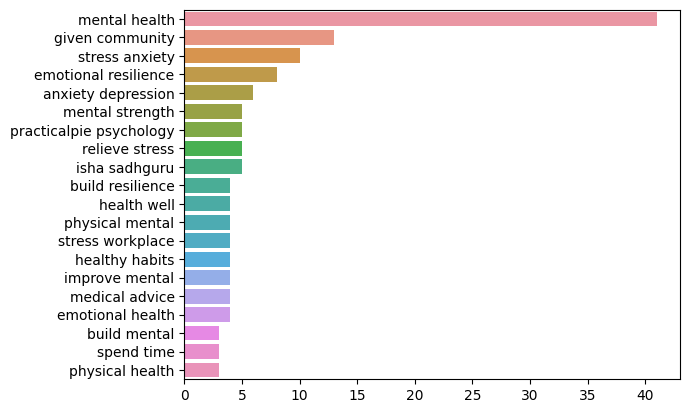

In [17]:
plot_top_ngrams(data_EE['Full_desc'],2)

### Depersonalization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


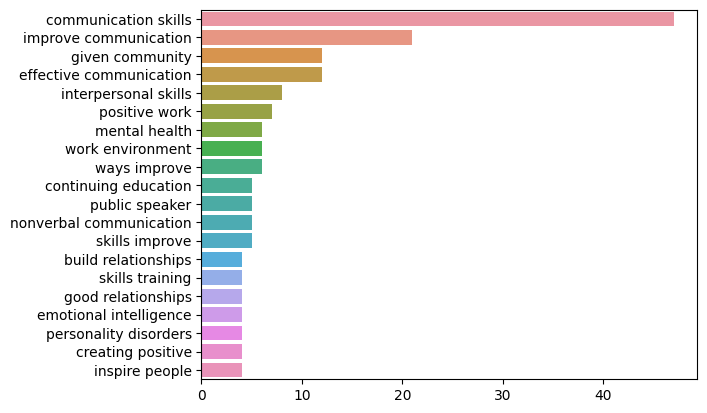

In [18]:
plot_top_ngrams(data_DP['Full_desc'],2)

### Personal Achievement

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


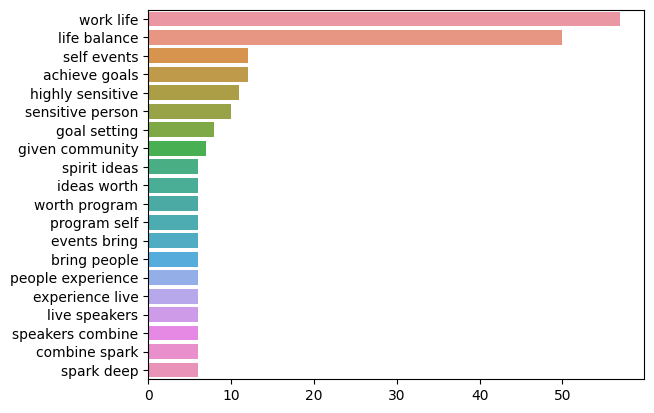

In [19]:
plot_top_ngrams(data_PA['Full_desc'],2)

### 3.2- Trigrams from All dimensions to extract Theme

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


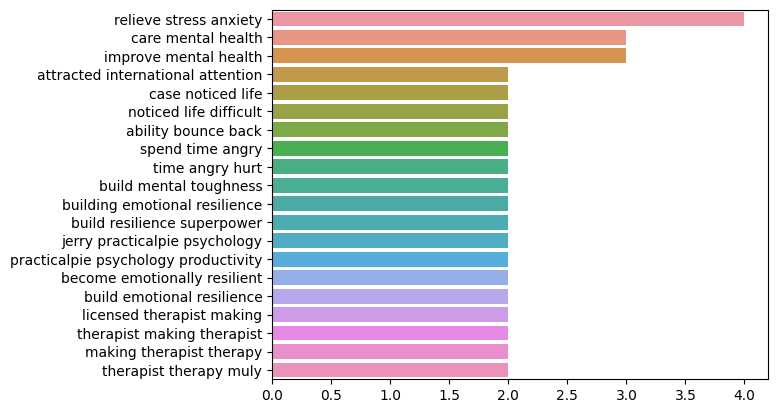

In [20]:
plot_top_ngrams(data_EE['Full_desc'],3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


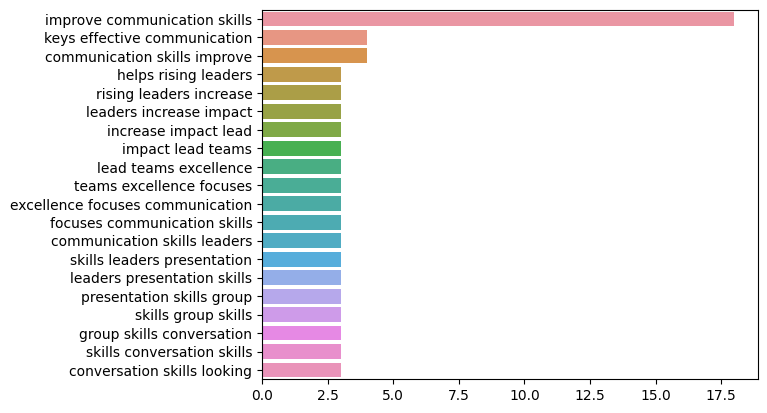

In [21]:
plot_top_ngrams(data_DP['Full_desc'],3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


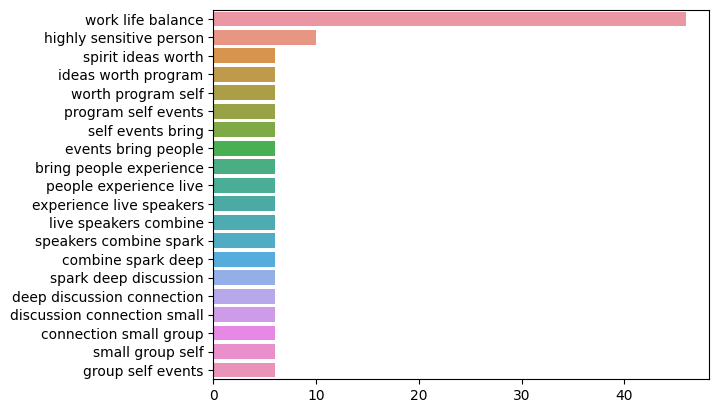

In [22]:
plot_top_ngrams(data_PA['Full_desc'],3)

### Step-4 Stemming and Lemmatization from video title + video_description to extract keywords, wordcloud and LDA modelling going further.

In [ ]:
stem = SnowballStemmer("english")

lemma = WordNetLemmatizer()

def tokenize_lemm(text):
    token = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]

    clean_tokens = []

    for x in token:
        if re.search('[a-zA-Z]', x):
            clean_tokens.append(x)

    lemmas = [lemma.lemmatize(t) for t in clean_tokens]
    return lemmas

reviews = data['Full_desc'].values.tolist()

stem_token_words = []

for i in reviews:
    words_lemma = tokenize_lemm(i)
    stem_token_words.extend(words_lemma)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.1 Wordcloud on all Video title + description

In [ ]:
#Top 50 keywords
def top_keywords(text, n = 2):
    new_text = text.str.split()
    new_text = new_text.values.tolist()
    corpus1 = [word for i in new_text for word in i]
    def top_ngram(corpus1, n = None):
        vector = CountVectorizer(ngram_range = (n, n)).fit(corpus1)
        bow = vector.transform(corpus1)
        sum_words = bow.sum(axis = 0)
        wordfreq = [(word, sum_words[0, idx])
                      for word, idx in vector.vocabulary_.items()]
        wordfreq = sorted(wordfreq,
                          key = lambda x: x[1],
                          reverse = True)
        return wordfreq[:50]

    top_n_bigrams = top_ngram(text,n)[:50]
    x,y = map(list,zip(*top_n_bigrams))
    key_df = pd.DataFrame({'Keyword':x,'Frequency':y})

    return x

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


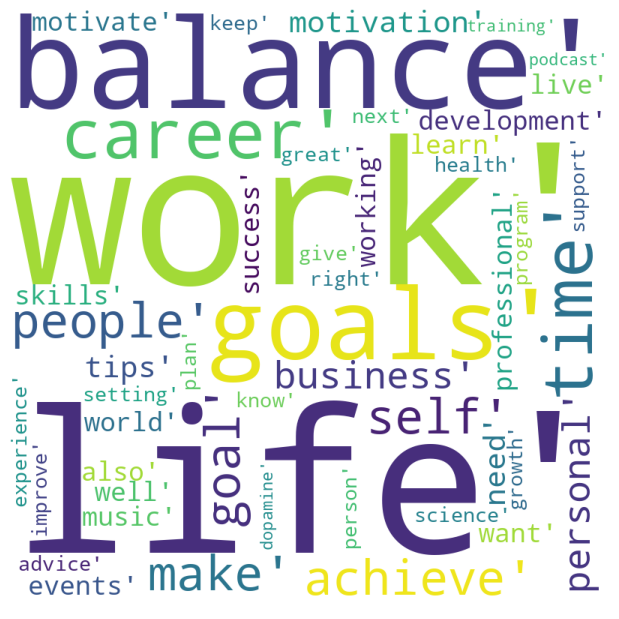

In [ ]:
# wordcloud_text = review_df_subset['Review'].values
wordcloud_text = top_keywords(data_PA['Full_desc'],1)
wordCloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(wordcloud_text))

# plot the WordCloud image
plt.figure(figsize = (6,6),facecolor = None)
plt.imshow(wordCloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## 6.4: LDA - Latent Topic modelling on each dimension

In [ ]:
# Function for applying LDA on Full_desc
def video_LDA(reviews):
    stem = SnowballStemmer("english")
    lemma = WordNetLemmatizer()

    def tokenize_lemm(text):
        token = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
        clean_tokens = []
        for x in token:
            if re.search('[a-zA-Z]', x):
                clean_tokens.append(x)
        lemmas = [lemma.lemmatize(t) for t in clean_tokens]
        return lemmas

    stem_token_words = []
    for i in reviews:
        words_lemma = tokenize_lemm(i)
        stem_token_words.extend(words_lemma)

    def sent_2_words(sentence):
      for x in sentence:
          yield(gensim.utils.simple_preprocess(str(x), deacc = True))

    data_words = list(sent_2_words(reviews))

    #Bigram and Trigram models for further analysis.....
    n_bigram = gensim.models.Phrases(data_words, min_count = 5, threshold = 100)
    n_trigram = gensim.models.Phrases(n_bigram[data_words], threshold = 100)

    # Clubbing the sentences
    bigram_model = gensim.models.phrases.Phraser(n_bigram)
    trigram_model = gensim.models.phrases.Phraser(n_trigram)

    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def bigrams_func(texts):
        return [bigram_model[x] for x in texts]

    def trigrams_func(texts):
        return [trigram_model[bigram_model[x]] for x in texts]

    def lemmatization_func(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent))
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    data_bigrams = bigrams_func(data_words)


    lemmatizedData = lemmatization_func(data_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

    # print(lemmatizedData[:5])
    Id2Word = corpora.Dictionary(lemmatizedData)

    # Create Corpus
    corpus3 = lemmatizedData

    # TDF
    corpus4 = [Id2Word.doc2bow(text) for text in corpus3]

    # Building LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus4, id2word = Id2Word, num_topics = 3,
                                                random_state = 100,
                                                update_every = 1,
                                                chunksize = 100,
                                                passes = 60, alpha = 'auto',
                                                per_word_topics = True)

    return lda_model , corpus4, lemmatizedData


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Wordcloud - Topic wise
def plot_LDA_topics(model):
  colors = [y for x, y in mcolors.TABLEAU_COLORS.items()]

  clouds = WordCloud(stopwords = stop_words, background_color = 'white', width = 2500, height = 1800, max_words = 15,
                    colormap = 'tab12', color_func = lambda *args, **kwargs: colors[i], prefer_horizontal = 1.0)

  topics = model.show_topics(formatted = False)

  figure, axis = plt.subplots(1, 3, figsize = (12,12), sharex = True, sharey = True)

  for i, j in enumerate(axis.flatten()):
      figure.add_subplot(j)
      topic_words = dict(topics[i][1])
      clouds.generate_from_frequencies(topic_words, max_font_size = 400)
      plt.gca().imshow(clouds)
      plt.gca().set_title('Topic ' + str(i), fontdict = dict(size = 16))
      plt.gca().axis('off')
  plt.subplots_adjust(wspace = 4, hspace = 4)
  plt.axis('off')
  plt.margins(x = 0, y = 0)
  plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# print(lda_model.print_topics())
model1 , corpus1, lemmatize1 = video_LDA(data_EE['Full_desc'].values.tolist())
model2 , corpus2, lemmatize2 = video_LDA(data_DP['Full_desc'].values.tolist())
model3 , corpus3, lemmatize3 = video_LDA(data_PA['Full_desc'].values.tolist())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##List of topics from each dimension

In [ ]:
topics1 = model1.show_topics(formatted = False)
topics2 = model2.show_topics(formatted = False)
topics3 = model3.show_topics(formatted = False)
for i in range (0,10):
  print(topics1[5][1][i][0])

mental
health
brain
work
time
emotional
take
stress
know
healthy


#### LDA for Emotional exhaustion

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


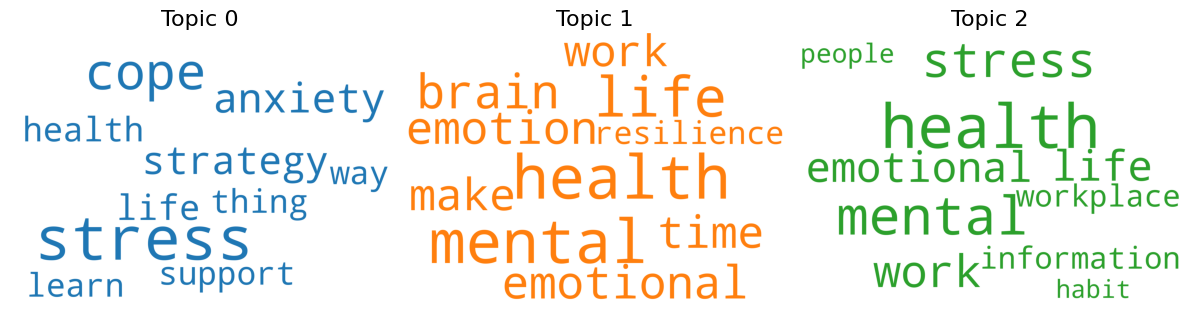

In [ ]:
#Plot the topics of Emotional Exhaustion
plot_LDA_topics(model1)

#### LDA for Depersonalization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


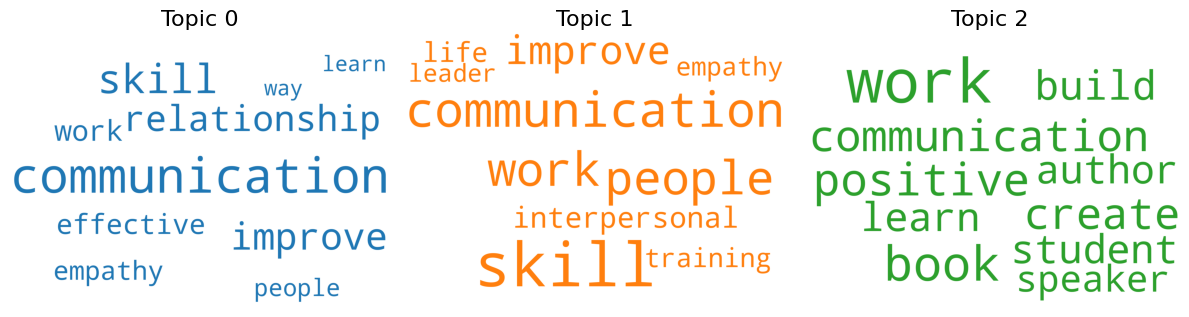

In [ ]:
plot_LDA_topics(model2)

#### LDA for Personal Achievement

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


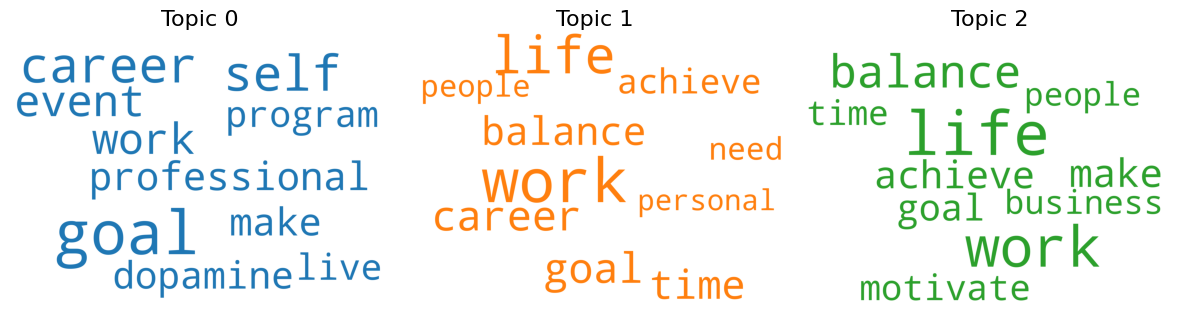

In [ ]:
plot_LDA_topics(model3)

### 7.3: Cluster the Videos by Dominant Topics determined by LDA modelling.

In [ ]:
#Understand about the dominant topic in each document

def topics_sentences(ldamodel = None, corpus = corpus1 , texts = lemmatize1):
    sent_topics_df = pd.DataFrame()
    num = []
    prop = []
    keyword= []
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                S = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in S])
                num.append(int(topic_num))
                prop.append(round(prop_topic,4))
                keyword.append(topic_keywords)

            else:
                break
    sent_topics_df = pd.DataFrame({'Dominant_Topic':num, 'Perc_Contribution':prop, 'Topic_Keywords': keyword})

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis = 1)
    return(sent_topics_df)

reviews = data_EE['Full_desc'].values.tolist()
review2 = pd.Series(reviews)
df_topic_sents_keywords = topics_sentences(ldamodel = model1, corpus = corpus1, texts = review2)

df_dominant_topic_EE = df_topic_sents_keywords.reset_index()
df_dominant_topic_EE.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Description']


reviews = data_DP['Full_desc'].values.tolist()
review3 = pd.Series(reviews)
df_topic_sents_keywords = topics_sentences(ldamodel = model2, corpus = corpus2, texts = review3)

df_dominant_topic_DP = df_topic_sents_keywords.reset_index()
df_dominant_topic_DP.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Description']

reviews = data_PA['Full_desc'].values.tolist()
review4 = pd.Series(reviews)
df_topic_sents_keywords = topics_sentences(ldamodel = model3, corpus = corpus3, texts = review4)

df_dominant_topic_PA = df_topic_sents_keywords.reset_index()
df_dominant_topic_PA.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Description']

df_dominant_topic_PA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Description
0,0,5,0.9984,"self, event, people, local, program, live, mot...",work love follow passion career advice tells f...
1,1,2,0.9994,"work, life, goal, balance, time, make, career,...",quit found years careers became software devel...
2,2,5,0.5121,"self, event, people, local, program, live, mot...",teach career fulfillment school given local pr...
3,3,2,0.9946,"work, life, goal, balance, time, make, career,...",love right privilege chosen hope saying love b...
4,4,2,0.9993,"work, life, goal, balance, time, make, career,...",bigth exclusive bigth leading source expert dr...
...,...,...,...,...,...
75,75,5,0.9995,"self, event, people, local, program, live, mot...",level life hyper capable professional developm...
76,76,3,0.9981,"playlist_list, dopamine, music, career, medica...",boss career growth professionals expect employ...
77,77,2,0.8771,"work, life, goal, balance, time, make, career,...",qualities needed detailed notes patrickbetdavi...
78,78,3,0.9968,"playlist_list, dopamine, music, career, medica...",behaviors increase confidence tells people cha...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Create a BoW representation of the comments
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_EE['Full_desc'].tolist())

# Use the KMeans algorithm to cluster the reviews into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Print the cluster assignments for each review
labels = kmeans.labels_

data_EE['cluster'] = labels

data_EE[['Video_Title','Video_Length','cluster']]
# # Visualize the clusters using a scatter plot
# plt.scatter(kmeans[:, 0], kmeans[:, 1], c=labels)
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Video_Title,Video_Length,cluster
6,The Secret of Becoming Mentally Strong | Amy M...,00:15:02,2
7,The three secrets of resilient people | Lucy H...,00:16:21,2
8,Building Resilience: 5 Ways to a Better Life,00:05:26,2
9,What Trauma Taught Me About Resilience | Charl...,00:14:22,0
10,Emotional Resiliency & Mental Toughness,00:04:24,0
...,...,...,...
213,The Fastest Way to Recover from Burnout,00:04:18,2
214,Why you should take a break: Prioritizing ment...,00:07:22,2
215,Burnout: Symptoms & Strategies,00:05:00,0
216,How to fight mental fatigue,00:01:10,2


##Distance between user keywords and video keywords

In [ ]:
burnout_vector = ['high emotional exhaustion','moderate depersonalization', 'moderate personal achievement']

EE_keywords = ['overwhelmed','annoyed', 'overworked','draining']
DP_keywords = ['frustrated','apathetic']
PA_keywords = ['supportive']

keyword_EE = EE_keywords + [burnout_vector[0]]
keyword_EE



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['overwhelmed',
 'annoyed',
 'overworked',
 'draining',
 'high emotional exhaustion']

### Cosine similarity between burnout domain keywords and intervention domain LDA keywords

In [ ]:
import spacy

from scipy import spatial

nlp = spacy.load("en_core_web_md")

set1 = keyword_EE   # Set 1
top_keywords_EE = df_dominant_topic_EE['Keywords']
similarity_EE = []

for i, set2 in enumerate(top_keywords_EE):

  vec1 = nlp(" ".join(set1)).vector

  vec2 = nlp(" ".join(set2)).vector

  similarity = 1 - spatial.distance.cosine(vec1, vec2)

  similarity_EE.append(similarity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sim_EE = df_dominant_topic_EE
sim_EE['similarity_score'] = similarity_EE

sim_EE = sim_EE.sort_values(by=['similarity_score'], ascending = False)
sim_EE = sim_EE.sort_values(['similarity_score','Keywords','Topic_Perc_Contrib'],ascending=False).groupby(['Keywords','similarity_score'])
doc_no = sim_EE.head(50).sample(n=20)['Document_No']

for i in doc_no[0:5]:
  print(data_EE['Video_Title'][i], data_EE['Video_Length'][i])

Coping With Stress & Caring for Mental Health During COVID-19 00:02:29
Stress: are we coping? 00:02:46
What Trauma Taught Me About Resilience | Charles Hunt | TEDxCharlotte 00:14:22


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: ignored